## <center> Electricity Demand Estimation for Leading Electricity Distributor </center>

### Business Requirement:

A prominent electricity distribution company is seeking to gain insights into the electricity demand over the upcoming 1-2 years. This information is crucial for effectively managing electricity production and vendor relationships. Obtaining precise demand estimates is a critical step in ensuring that electricity procurement and production align seamlessly with market requirements.

### Data Availability:

The dataset comprises monthly electricity consumption records spanning from January 1973 to December 2019. Our objective is to generate a robust demand forecast for the upcoming two years, considering the following variables:

1. Date – Represented by Month and Year.
2. Electricity Consumption – Measured in Trillion Watts.

### Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Data Gathering and Preparation

In [3]:
df = pd.read_csv("E:\
CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Demand Estimation Case Study\Electricity Consumption.csv")
actual_df = pd.read_csv("E:\
CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Demand Estimation Case Study\Electricity Consumption.csv")

In [4]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [5]:
df.tail()

,DATE,Electricty_Consumption_in_TW
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [7]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [8]:
df.rename(columns={'DATE':'Date'}, inplace=True)

In [9]:
#Checking missing values
missing_values = df.isnull().sum()
print(missing_values)

Date                            0
Electricty_Consumption_in_TW    0
dtype: int64


In [10]:
# Checking duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


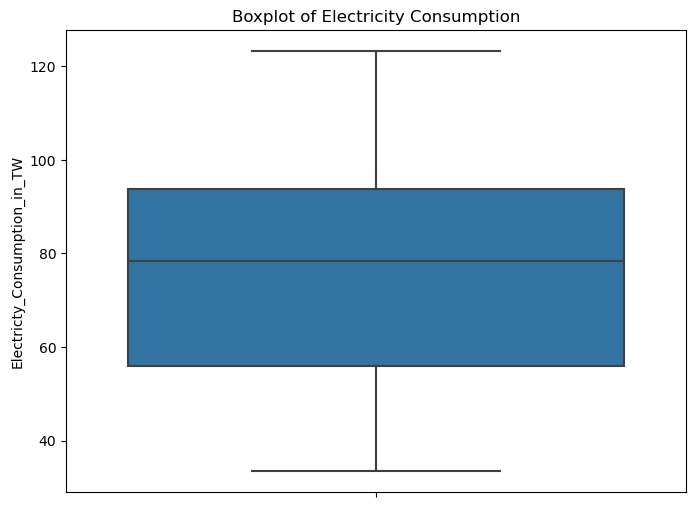

In [11]:
# Outliers detection
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Electricty_Consumption_in_TW'])
plt.title('Boxplot of Electricity Consumption')
plt.show()

In [12]:
# Checking datatypes in columns
# Check data types of columns
data_types = df.dtypes
print(data_types)

Date                             object
Electricty_Consumption_in_TW    float64
dtype: object


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
data_types = df.dtypes
print(data_types)

Date                            datetime64[ns]
Electricty_Consumption_in_TW           float64
dtype: object


In [15]:
# Checking if there are negative values for electricity consumption
negative_values = df[df['Electricty_Consumption_in_TW'] < 0]
print("Negative values:", negative_values)

Negative values: Empty DataFrame
Columns: [Date, Electricty_Consumption_in_TW]
Index: []


In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

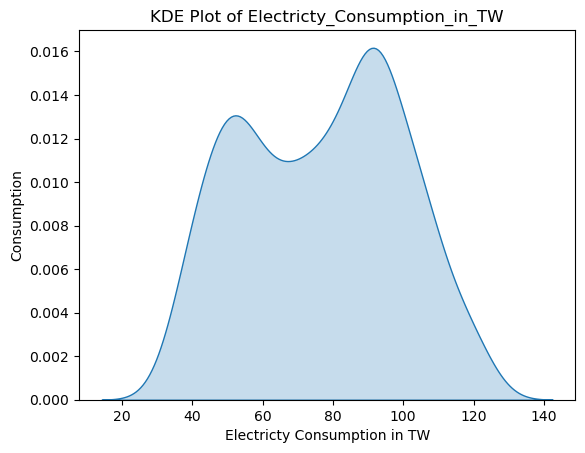

In [17]:
sns.kdeplot(df['Electricty_Consumption_in_TW'], shade=True)
plt.xlabel('Electricty Consumption in TW')
plt.ylabel('Consumption')
plt.title(f'KDE Plot of Electricty_Consumption_in_TW')
plt.show()

### Data Exploration

Visualize the data

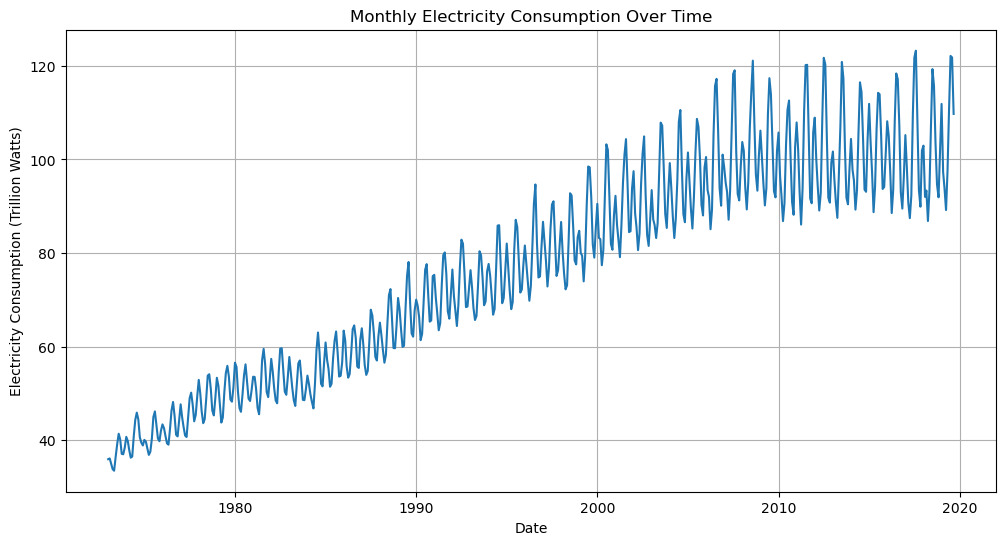

In [18]:
# Plot monthly electricity consumption
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Electricty_Consumption_in_TW')
plt.title('Monthly Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (Trillion Watts)')
plt.grid(True)
plt.show()

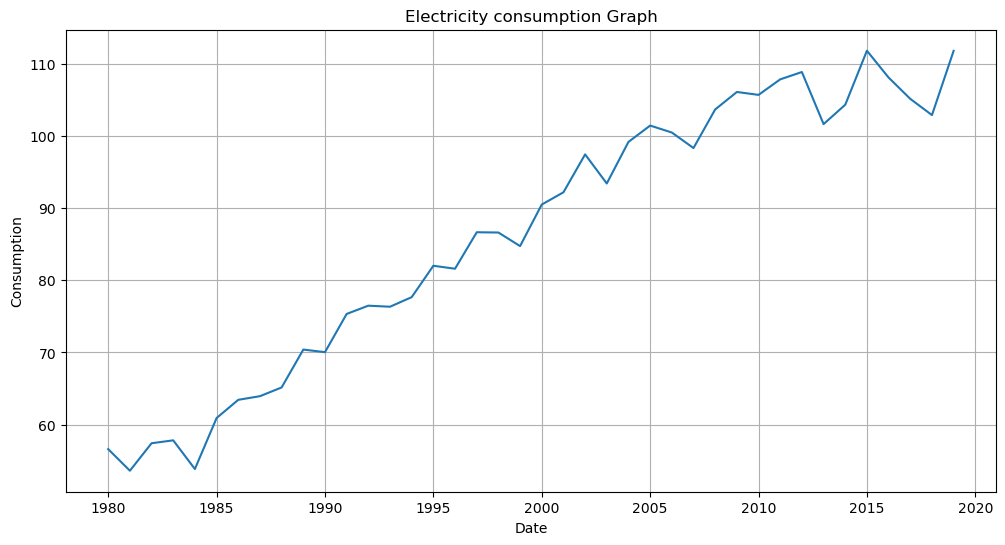

In [19]:
plt.figure(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("Electricity consumption Graph")
sns.lineplot(x='Date', y='Electricty_Consumption_in_TW', data=df[df['Date'].isin(['1980-01','1981-01','1982-01','1983-01','1984-01','1985-01','1986-01','1987-01','1988-01','1989-01','1990-01', '1991-01', '1992-01', '1993-01', '1994-01', '1994-01', '1995-01', '1996-01', '1997-01', '1998-01', '1999-01', '2000-01', '2001-01', '2002-01', '2003-01', '2004-01', '2005-01', '2006-01', '2007-01', '2008-01', '2009-01', '2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])])
plt.grid(True)
plt.show()

In the context of time series forecasting, it is imperative to ensure that the underlying series exhibits stationarity. Stationarity implies that the series maintains a consistent mean, variance, and covariance structure over time.

However, upon close examination of our dataset, it becomes evident that the mean of the series does not remain constant. An observable upward trend is present, indicating a departure from stationarity.

Thus, our initial assessment reveals that the time series data is non-stationary. To proceed with time series forecasting, we must transform the data into a stationary form. In the subsequent phase of our analysis, our focus will be on achieving this critical transformation.

As part of our exploration, let us visualize the data through a scatterplot to gain further insights.

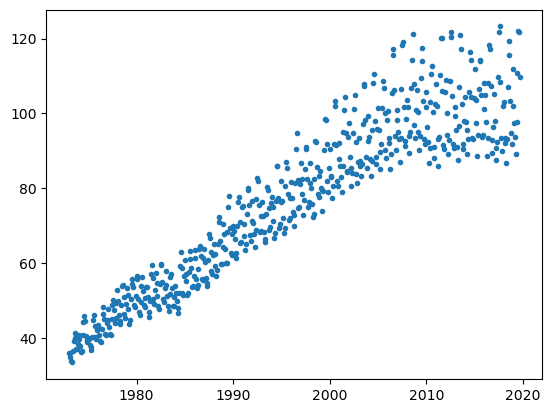

In [20]:
plt.scatter(df['Date'], df['Electricty_Consumption_in_TW'], marker='.', linestyle='None')
plt.show()

In [21]:
df['Electricty_Consumption_in_TW'].skew()

-0.03460717297314135

If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

The dataset exhibits a nearly normal distribution, resembling a bell curve, with a slight leftward skew (skewness = -0.03).

In time series analysis, data is composed of systematic components and noise:

Level: Represents the series' average value.
Trend: Reflects long-term directional changes.
Seasonality: Involves recurring short-term patterns.
Noise: Signifies random fluctuations.
To perform effective time series analysis, separating trend and seasonality from the series is essential. This process enhances data stationarity and prepares it for further analysis.

### Model Selection and Training

#### Decomposition Model

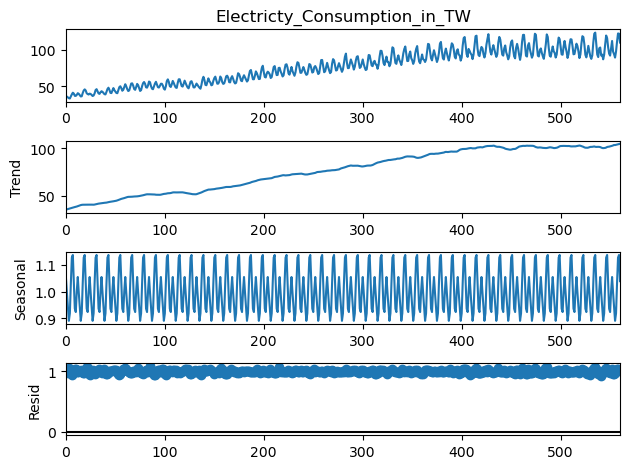

In [22]:
result = seasonal_decompose(df['Electricty_Consumption_in_TW'], model='multiplicative', extrapolate_trend='freq', period=12)
result.plot()
plt.show()

In [23]:
df.set_index('Date', inplace=True)

In [24]:
model = ExponentialSmoothing(df['Electricty_Consumption_in_TW'], seasonal='add', seasonal_periods=12)
ets_fit = model.fit()

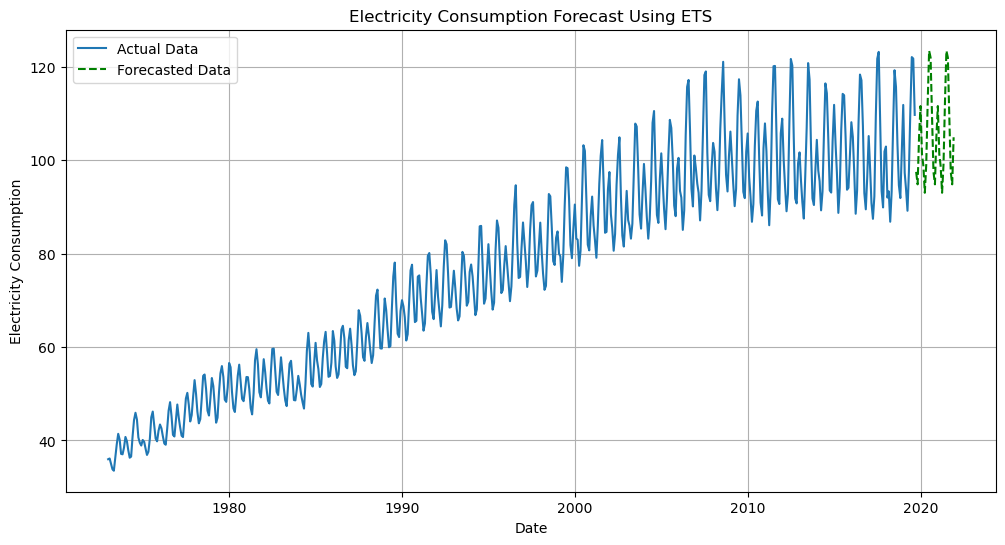

Forecasted Values for the Next 12 Months:
2019-10-01     97.515247
2019-11-01     94.846963
2019-12-01    104.929660
2020-01-01    111.615583
2020-02-01    101.327797
2020-03-01     98.873765
2020-04-01     93.040920
2020-05-01     99.075025
2020-06-01    112.487512
2020-07-01    123.465510
2020-08-01    122.021606
2020-09-01    109.272098
2020-10-01     97.515247
2020-11-01     94.846963
2020-12-01    104.929660
2021-01-01    111.615583
2021-02-01    101.327797
2021-03-01     98.873765
2021-04-01     93.040920
2021-05-01     99.075025
2021-06-01    112.487512
2021-07-01    123.465510
2021-08-01    122.021606
2021-09-01    109.272098
2021-10-01     97.515247
2021-11-01     94.846963
2021-12-01    104.929660
Freq: MS, dtype: float64


In [25]:
# Forecast for the next 12 months
ets_forecast_df = ets_fit.forecast(steps=27)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Electricty_Consumption_in_TW'], label='Actual Data')
plt.plot(ets_forecast_df, label='Forecasted Data', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.title('Electricity Consumption Forecast Using ETS')
plt.grid(True)
plt.show()

# Access the forecasted values
print("Forecasted Values for the Next 12 Months:")
print(ets_forecast_df)

In [26]:
ets_forecast_df = pd.DataFrame(ets_forecast_df)

In [27]:
ets_forecast_df.reset_index(inplace=True)

In [28]:
ets_forecast_df.rename(columns={'index':'Date', 0:'Electricty_Consumption_in_TW'}, inplace=True)

In [29]:
ets_forecast_df.set_index('Date', inplace=True)

In [30]:
ets_forecast_df

,Electricty_Consumption_in_TW
Date,
2019-10-01,97.515247
2019-11-01,94.846963
2019-12-01,104.929660
2020-01-01,111.615583
2020-02-01,101.327797
2020-03-01,98.873765
2020-04-01,93.040920
2020-05-01,99.075025
2020-06-01,112.487512


### ARIMA/SARIMA MODEL

#### Assessing Stationarity in Time Series Data

The first critical step in our analysis involves evaluating the stationarity of the time series data. Stationarity is a fundamental concept in time series analysis as it directly impacts the effectiveness of predictive modeling.

Augmented Dickey-Fuller (ADF) Test
To determine the stationarity of a time series, we rely on the Augmented Dickey-Fuller (ADF) test, a widely recognized statistical test. The primary purpose of the ADF test is to ascertain the presence of a unit root within the time series, which, in turn, helps us determine whether the series is stationary or not. The null and alternate hypotheses for the ADF test are as follows:

<b> Null Hypothesis</b>: Timeseries is not stationary.

<b> Alternate Hypothesis</b>: Timeseries is stationary.

In the event that we fail to reject the null hypothesis, we conclude that the time series is non-stationary. Non-stationarity implies that the series may exhibit linear or difference stationary behavior (further details about difference stationary will be explored in the subsequent section).

A key characteristic of a stationary series is that both its mean and standard deviation remain constant over time, represented as flat lines on a plot. Recognizing stationarity is crucial as it enables us to proceed with accurate modeling and predictions.

The function provided below facilitates the visualization of a time series, along with its rolling mean and standard deviation, aiding us in our efforts to assess stationarity.

In [31]:
def series_stationarity_test(df):
    #roll mean and standard
    rollingmean = df.rolling(12).mean()
    rollingstd = df.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(df, color='blue', label='Original')
    plt.plot(rollingmean, color='red', label='Rolling Mean')
    plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')

    #perform dickey fuller test  
    print("Dickey Fuller Test")
    datapoints = adfuller(df)
    output = pd.Series(datapoints[0:4], index=['Test_parameters: ','p-value: ','Lags_used: ','Data_obervations: '])
    for key,values in datapoints[4].items():
        output[key] = values
    print(output)

Dickey Fuller Test
Test_parameters:       -1.740593
p-value:                0.410328
Lags_used:             15.000000
Data_obervations:     545.000000
1%                     -3.442406
5%                     -2.866858
10%                    -2.569602
dtype: float64


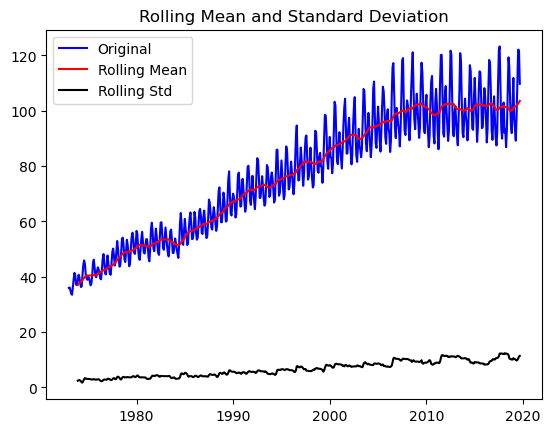

In [32]:
series_stationarity_test(df)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis.
To get a stationary series, we need to eliminate the trend and seasonality from the series.

Taking the difference of data

In [33]:
df['Electricty_Consumption_in_TW'] = df['Electricty_Consumption_in_TW'].diff().dropna()

In [34]:
df = df.dropna()

Dickey Fuller Test
Test_parameters:     -7.941665e+00
p-value:              3.301344e-12
Lags_used:            1.400000e+01
Data_obervations:     5.450000e+02
1%                   -3.442406e+00
5%                   -2.866858e+00
10%                  -2.569602e+00
dtype: float64


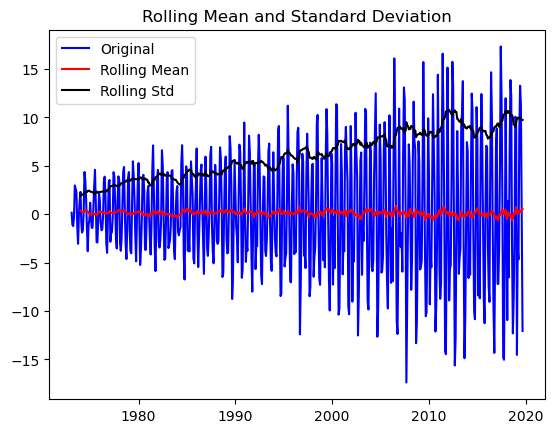

In [35]:
series_stationarity_test(df)

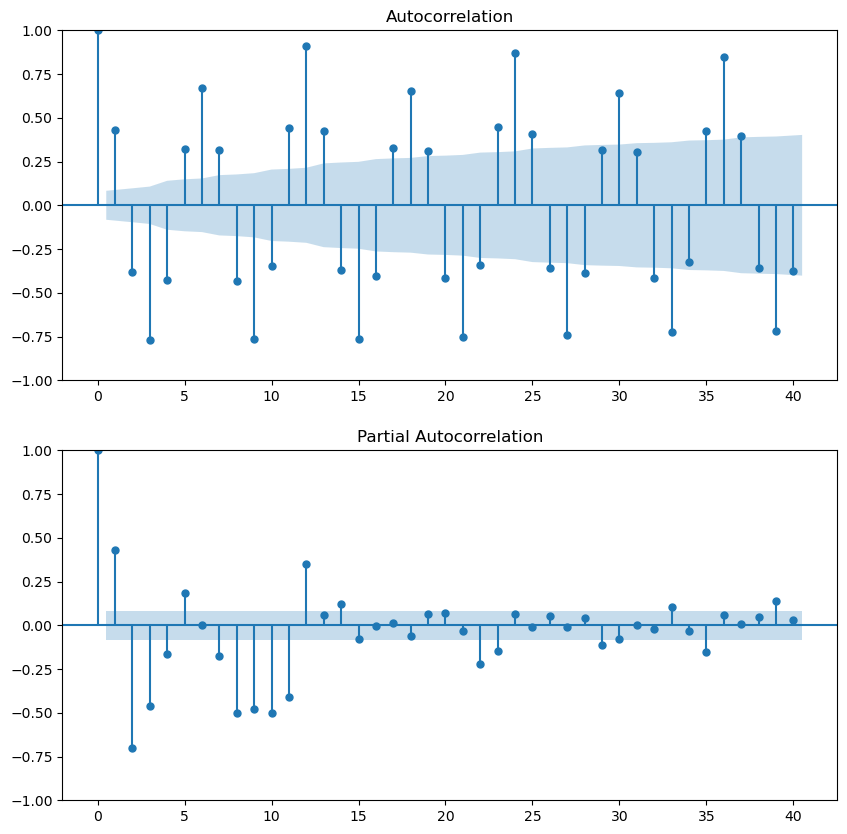

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
plot_acf(df['Electricty_Consumption_in_TW'], lags=40, ax=ax1)
plot_pacf(df['Electricty_Consumption_in_TW'], lags=40, ax=ax2)
plt.show()

In [37]:
df.to_csv('differenced_df')

In [38]:
# Taking train and test sample of actual data, for metrics evaluation
train_actual_df = actual_df.loc[:533, ] 
test_actual_df = actual_df.loc[534:, ]

In [39]:
test_actual_df.rename(columns={'DATE':'Date'}, inplace=True)
test_actual_df.set_index('Date', inplace=True)

In [40]:
test_actual_df.value_counts().info()

<class 'pandas.core.series.Series'>
MultiIndex: 27 entries, (86.8386,) to (123.2163,)
Series name: None
Non-Null Count  Dtype
--------------  -----
27 non-null     int64
dtypes: int64(1)
memory usage: 1.6 KB


In [41]:
train = df[:447]
test = df[448:]

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 447 entries, 1973-02-01 to 2010-04-01
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Electricty_Consumption_in_TW  447 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [43]:
len(df)-1

559

In [44]:
len(train), len(test)

(447, 112)

In [45]:
len(train)+len(test)

559

In [46]:
p = range(0, 5)
d = range(0, 2)
q = range(0, 5)

In [47]:
pdq_combination = list(itertools.product(p, q, d))

In [48]:
pdq_combination[1]

(0, 0, 1)

In [49]:
order1 = []
rmse = []

# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Order', 'RMSE', 'MAPE', 'RMSPE'])

order1 = []
rmse = []

# Loop through the pdq_combination
for pdq in pdq_combination:
    arima_model = ARIMA(train['Electricty_Consumption_in_TW'], order=pdq)
    arima_fit = arima_model.fit()
    pred = arima_fit.predict(start=448, end=559, dynamic=True)
    
    #Calculate RMSE
    rmse_error = np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'], pred))

    print(f"Order: {pdq}, RMSE: {rmse_error}")
    
    # Append the values to the lists
    order1.append(pdq)
    rmse.append(rmse_error)

# Create a DataFrame with the results
results = pd.DataFrame({'Order': order1, 'RMSE': rmse})

Order: (0, 0, 0), RMSE: 9.102522937345986
Order: (0, 0, 1), RMSE: 9.102579232691912
Order: (0, 1, 0), RMSE: 10.710556165185315
Order: (0, 1, 1), RMSE: 11.61402534563971
Order: (0, 2, 0), RMSE: 93.13399767333173
Order: (0, 2, 1), RMSE: 11.131350703041083
Order: (0, 3, 0), RMSE: 19099.515197317858
Order: (0, 3, 1), RMSE: 94.0046396865507
Order: (0, 4, 0), RMSE: 2396971.458122017
Order: (0, 4, 1), RMSE: 20759.13260669312
Order: (1, 0, 0), RMSE: 9.117909498225213
Order: (1, 0, 1), RMSE: 9.110468198089077
Order: (1, 1, 0), RMSE: 10.90650193274407
Order: (1, 1, 1), RMSE: 9.11815378608938
Order: (1, 2, 0), RMSE: 47.83922548029962
Order: (1, 2, 1), RMSE: 11.387206798203922
Order: (1, 3, 0), RMSE: 3960.371315676277
Order: (1, 3, 1), RMSE: 45.9176333333308
Order: (1, 4, 0), RMSE: 447358.27030083066
Order: (1, 4, 1), RMSE: 3972.7673731858913
Order: (2, 0, 0), RMSE: 8.966355100346417
Order: (2, 0, 1), RMSE: 8.857769562946034
Order: (2, 1, 0), RMSE: 11.816271628694142
Order: (2, 1, 1), RMSE: 8.9666

In [50]:
df_results = results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

In [51]:
df_results.head(1)

,Order,RMSE
0,"(4, 1, 1)",8.426677


In [52]:
# So based on pdq order sequence search, we analyzed, (4, 1, 1) gace us the minimum error, so we will proceed with it

In [53]:
arima_model1 = ARIMA(train['Electricty_Consumption_in_TW'], order=(4, 1, 1))
arima_fit1 = arima_model1.fit()
pred1 = arima_fit1.predict(start=448, end=559, dynamic=True)

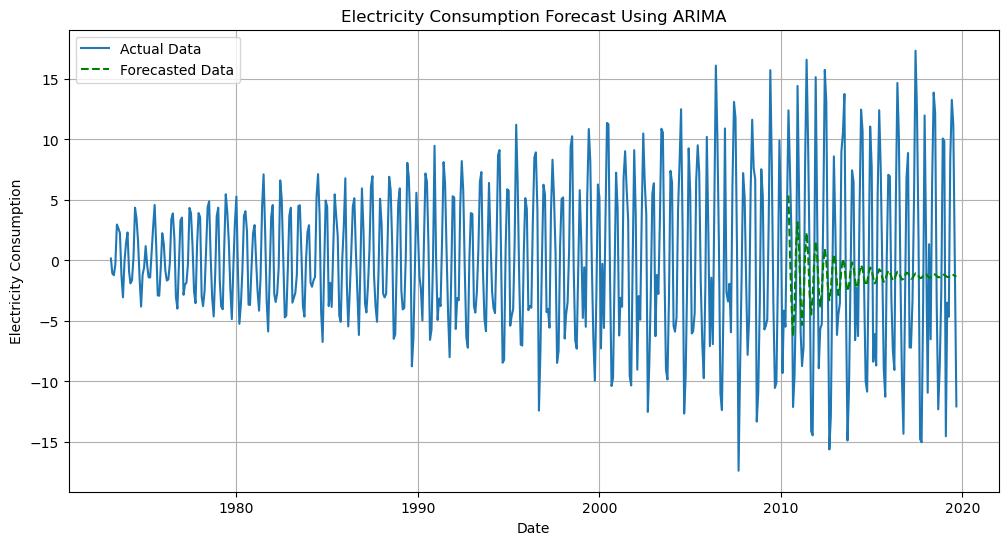

In [54]:
# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['Electricty_Consumption_in_TW'], label='Actual Data')
plt.plot(pred1, label='Forecasted Data', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.title('Electricity Consumption Forecast Using ARIMA')
plt.grid(True)
plt.show()

In [55]:
# Create and fit the SARIMA model on the training data
arima_model1 = ARIMA(df, order=(4, 1, 1))
arima_fit1 = arima_model1.fit()
arima_forecast = arima_fit1.get_forecast(steps=27)
arima_forecast_mean = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

In [56]:
arima_forecast_df = pd.DataFrame(arima_forecast_mean)
arima_forecast_df = arima_forecast_df.reset_index()
arima_forecast_df.rename(columns={'index':'Date', 'predicted_mean':'Electricty_Consumption_in_TW'}, inplace=True)
arima_forecast_df.set_index('Date', inplace=True)
arima_forecast_df

,Electricty_Consumption_in_TW
Date,
2019-10-01,-6.191925
2019-11-01,5.083252
2019-12-01,12.882827
2020-01-01,10.241066
2020-02-01,-0.782693
2020-03-01,-8.014594
2020-04-01,-5.343512
2020-05-01,3.984395
2020-06-01,10.825237


In [57]:
ar_df_new = pd.concat([df, arima_forecast_df], axis=0)

In [58]:
ns_ar_df_new = ar_df_new.cumsum()

In [59]:
ns_ar_df_new = ns_ar_df_new.reset_index()

In [60]:
ar_df_old = ns_ar_df_new.loc[:559, ]
ar_df_pred = ns_ar_df_new.loc[560:, ]

ar_df_old.set_index('Date', inplace=True)
ar_df_pred.set_index('Date', inplace=True)

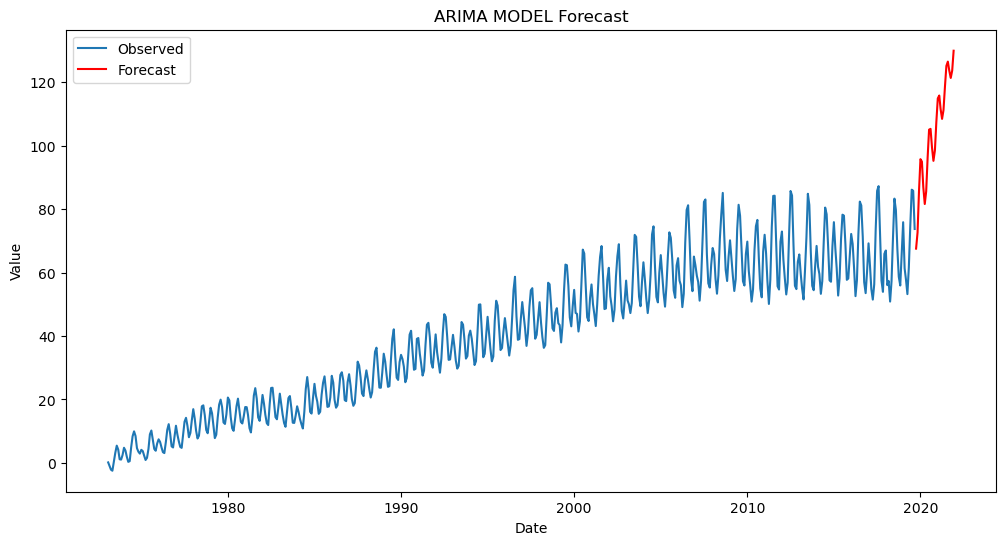

In [61]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(ar_df_old, label='Observed')
plt.plot(ar_df_pred, color='red', label='Forecast')
plt.title('ARIMA MODEL Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

##### ARIMA is not understanding the seasonal trend for monthly electricity prediction for monthly basis. Giving a drastic increase

### SARIMA Model

In [62]:
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

pdq_combination = list(itertools.product(p, q, d))


# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Order', 'RMSPE', 'RMSE', 'MAPE'])

order1 = []
seasonal_order =[]
rmse = []
mae = []
rmspe =[]

# Loop through the pdq_combination
for pdq in pdq_combination:
    sarima_model = sn.tsa.SARIMAX(train['Electricty_Consumption_in_TW'], order=pdq, seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit()
    pred = sarima_fit.predict(start=448, end=559, dynamic=True)
    
    #Calculate RMSE
    rmse_error = np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'], pred))
    mae_error = np.mean(np.abs(test['Electricty_Consumption_in_TW'] - pred))
    rmspe_error = np.sqrt(np.mean(((test['Electricty_Consumption_in_TW'] - pred) / test['Electricty_Consumption_in_TW'])**2)) * 100


    #print(f"Order: {pdq}, Seasonal_order: {seasonal_order}, RMSE: {rmse_error}")
    
    # Append the values to the lists
    order1.append(pdq)
    rmse.append(rmse_error)
    mae.append(mae_error)
    rmspe.append(rmspe_error)

# Create a DataFrame with the results
results = pd.DataFrame({'Order': order1, 'RMSPE': rmspe, 'RMSE': rmse, 'MAE':mae})

In [63]:
df_results = results.sort_values(by=['RMSPE', 'RMSE', 'MAE'], ascending=[True, True, True]).reset_index(drop=True)
df_results = pd.DataFrame(df_results)

In [64]:
df_results.head(15)

,Order,RMSPE,RMSE,MAE
0,"(0, 2, 1)",114.040131,2.853334,2.232249
1,"(0, 1, 0)",121.816294,2.969252,2.316829
2,"(2, 1, 1)",130.467295,2.654766,2.117999
3,"(1, 1, 0)",133.384981,2.719910,2.151748
4,"(2, 0, 0)",133.838125,2.652614,2.118425
5,"(1, 1, 1)",138.497159,2.662548,2.119899
6,"(0, 0, 1)",138.736691,2.648501,2.111996
7,"(0, 1, 1)",140.195340,2.672172,2.128633
8,"(1, 2, 1)",140.428959,2.688459,2.130695
9,"(1, 0, 0)",142.231135,2.660673,2.119802


In [65]:
# Define the SARIMA model order and seasonal order (p, d, q, P, D, Q, s)
p = 0  # AR order
d = 2  # Differencing order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA order
s = 12  # Seasonal period (e.g., 12 for monthly data)

# Create and fit the SARIMA model on the training data
sarima_model = sn.tsa.SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Perform out-of-sample forecasting on the test data
forecast_horizon = len(test)
forecast = sarima_results.get_forecast(steps=forecast_horizon)
# Get the forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

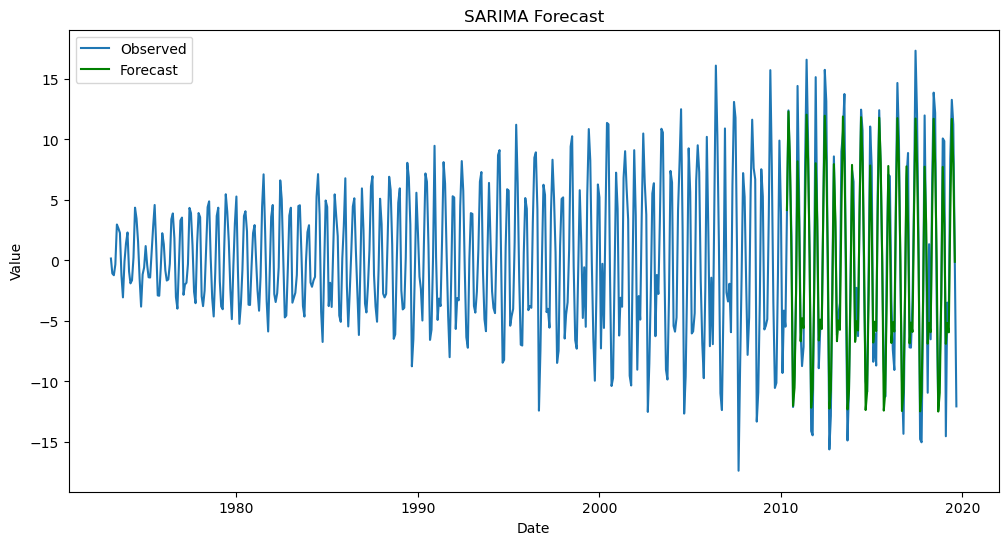

In [66]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Observed')
plt.plot(forecast_mean, color='green', label='Forecast')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [67]:
# Create and fit the SARIMA model on the training data
sarima_model1 = sn.tsa.SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results1 = sarima_model1.fit()
future_pred = sarima_results1.get_forecast(steps=27)
# Get the forecasted values and confidence intervals
forecast1_mean = future_pred.predicted_mean
forecast_ci = future_pred.conf_int()

In [68]:
pred_future_df = pd.DataFrame(forecast1_mean)
pred_future_df = pred_future_df.reset_index()
pred_future_df.rename(columns={'index':'Date', 'predicted_mean':'Electricty_Consumption_in_TW'}, inplace=True)
pred_future_df.set_index('Date', inplace=True)
pred_future_df

,Electricty_Consumption_in_TW
Date,
2019-10-01,-11.338384
2019-11-01,-2.082459
2019-12-01,9.832172
2020-01-01,6.602273
2020-02-01,-9.314616
2020-03-01,-3.858370
2020-04-01,-5.528512
2020-05-01,6.474333
2020-06-01,14.029664


In [69]:
df_new = pd.concat([df, pred_future_df], axis=0)

In [70]:
df_new

,Electricty_Consumption_in_TW
Date,
1973-02-01,0.160600
1973-03-01,-1.070900
1973-04-01,-1.220900
1973-05-01,-0.330900
1973-06-01,2.971600
...,...
2021-08-01,-0.623167
2021-09-01,-11.882026
2021-10-01,-11.357146


In [71]:
ns_df_new = df_new.cumsum()

In [72]:
ns_df_new

,Electricty_Consumption_in_TW
Date,
1973-02-01,0.160600
1973-03-01,-0.910300
1973-04-01,-2.131200
1973-05-01,-2.462100
1973-06-01,0.509500
...,...
2021-08-01,93.031726
2021-09-01,81.149700
2021-10-01,69.792554


In [73]:
ns_df_new = ns_df_new.reset_index()

In [74]:
ns_df_new.tail(20)

,Date,Electricty_Consumption_in_TW
567,2020-05-01,64.532637
568,2020-06-01,78.562301
569,2020-07-01,89.731688
570,2020-08-01,89.050725
571,2020-09-01,77.081186
572,2020-10-01,65.647623
573,2020-11-01,63.681614
574,2020-12-01,73.572029
575,2021-01-01,80.037281
576,2021-02-01,71.137832


In [75]:
df_old = ns_df_new.loc[:559, ]
df_pred = ns_df_new.loc[560:, ]

df_old.set_index('Date', inplace=True)
df_pred.set_index('Date', inplace=True)

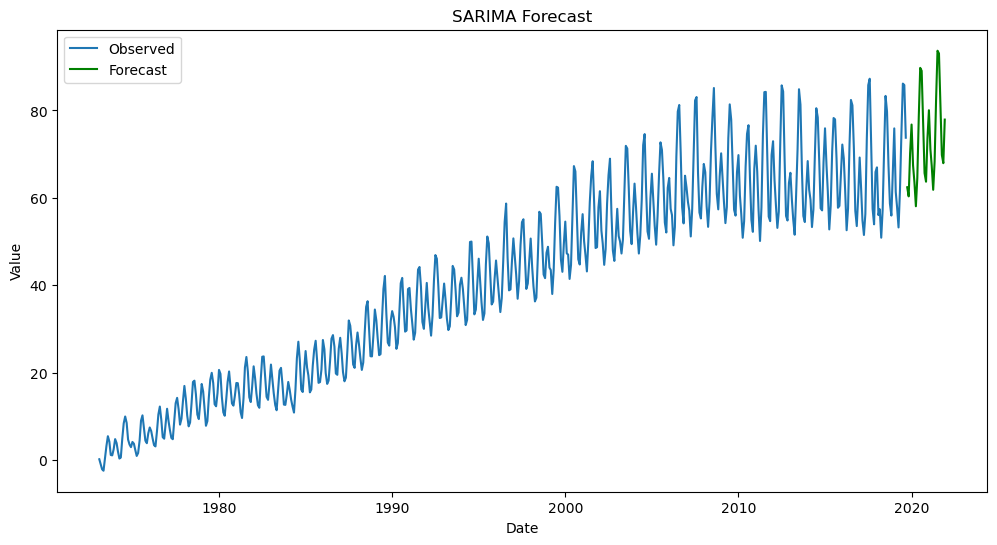

In [76]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_old, label='Observed')
plt.plot(df_pred, color='green', label='Forecast')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [77]:
actual_df = pd.DataFrame(actual_df)
actual_df.rename(columns={'DATE':'Date'}, inplace=True)
actual_df.set_index('Date', inplace=True)

In [78]:
# Actual and forecasted values for each model
actual_df = pd.Series(test_actual_df['Electricty_Consumption_in_TW'])
actual_values = np.array([actual_df])
actual_values

array([[121.7478, 123.2163, 108.4514,  93.4264,  89.9026, 101.8836,
        102.9398,  92.0095,  93.3526,  86.8386,  93.2361, 107.1009,
        119.2874, 115.7108, 103.407 ,  94.6492,  91.9079, 101.9883,
        111.852 ,  97.3261,  93.8406,  89.1873,  97.586 , 110.858 ,
        122.1014, 121.7765, 109.719 ]])

In [79]:
df_pred = pd.Series(df_pred['Electricty_Consumption_in_TW'])
sarima_forecast = np.array([df_pred])
sarima_forecast

array([[62.40781628, 60.32535705, 70.15752903, 76.75980212, 67.44518577,
        63.58681618, 58.058304  , 64.53263706, 78.5623008 , 89.73168815,
        89.05072485, 77.08118576, 65.64762291, 63.6816137 , 73.57202894,
        80.03728068, 71.1378318 , 67.33205844, 61.82427357, 68.25188084,
        82.41017514, 93.65489252, 93.03172597, 81.14970018, 69.79255404,
        67.91755482, 77.89601356]])

In [80]:
ar_df_pred = pd.Series(ar_df_pred['Electricty_Consumption_in_TW'])
arima_forecast = np.array([ar_df_pred])
arima_forecast

array([[ 67.55427501,  72.63752692,  85.52035426,  95.76142034,
         94.97872755,  86.9641331 ,  81.6206212 ,  85.60501638,
         96.43025314, 105.05962811, 105.30677786,  99.3998659 ,
         95.22946051,  98.5081445 , 107.42101618, 114.92249506,
        115.82325785, 111.58400187, 108.46032354, 111.19517285,
        118.61105591, 125.15895707, 126.51370133, 123.60622725,
        121.35959984, 123.7138717 , 129.9451603 ]])

In [81]:
ets_forecast_df = pd.Series(ets_forecast_df['Electricty_Consumption_in_TW'])
ets_forecast = np.array([ets_forecast_df])
ets_forecast

array([[ 97.5152474 ,  94.84696284, 104.92966001, 111.61558309,
        101.32779697,  98.87376539,  93.04092003,  99.07502522,
        112.48751188, 123.46550955, 122.02160606, 109.27209849,
         97.5152474 ,  94.84696284, 104.92966001, 111.61558309,
        101.32779697,  98.87376539,  93.04092003,  99.07502522,
        112.48751188, 123.46550955, 122.02160606, 109.27209849,
         97.5152474 ,  94.84696284, 104.92966001]])

In [82]:
def calculate_metrics(actual, forecast):
    rmse = np.sqrt(np.mean((actual - forecast)**2))
    mae = np.mean(np.abs(actual - forecast))
    rmspe = np.sqrt(np.mean(((actual - forecast) / actual)**2)) * 100
    return rmse, mae, rmspe

sarima_rmse, sarima_mae, sarima_rmspe = calculate_metrics(actual_values, sarima_forecast)
arima_rmse, arima_mae, arima_rmspe = calculate_metrics(actual_values, arima_forecast)
ets_rmse, ets_mae, ets_rmspe = calculate_metrics(actual_values, ets_forecast)

# Print and compare the metrics
print(f'SARIMA - RMSE: {sarima_rmse}, MAE: {sarima_mae}, RMSPE: {sarima_rmspe}')
print(f'ARIMA - RMSE: {arima_rmse}, MAE: {arima_mae}, RMSPE: {arima_rmspe}')
print(f'ETS - RMSE: {ets_rmse}, MAE: {ets_mae}, RMSPE: {ets_rmspe}')

SARIMA - RMSE: 35.735086009971376, MAE: 30.925478043406642, RMSPE: 32.008262525497265
ARIMA - RMSE: 21.77900801207416, MAE: 17.054485304083755, RMSPE: 20.431056287067946
ETS - RMSE: 18.947852640490698, MAE: 15.625996443517463, RMSPE: 18.84709891595449


### Model Selection: 

Based on the plot, selected metrics, and model performace, ARIMA model is showing drastic value increase. ETS and SARIMA are giving better results. With SARIMA though the model is giving more error but when we plot the predicted it gives better data. So, based on metrics evaluation (with non-stationary data), ETS model is performing better. If we want to take the stationary data, then SARIMa is working better.